# RVC 1, Ch2.2
https://petercorke.github.io/spatialmath-python/func_3d.html

In [1]:
# Works best with jupyter-notebook

In [2]:
%matplotlib notebook 
#%matplotlib widget 
# https://ipython.readthedocs.io/en/stable/interactive/magics.html
import numpy as np

from spatialmath import *
from spatialmath.base import *
from roboticstoolbox import *
import matplotlib.pyplot as plt

np.set_printoptions(linewidth=100, formatter={'float': lambda x: f"{x:8.4g}" if abs(x) > 1e-10 else f"{0:8.4g}"})

## Lec 3.11 Angle-axis

Create a rotation matrix that rotates around x by 0.3 radians

In [3]:
R1=angvec2r(0.867, [1, 0, 0])  # rotx(0.3)
print(R1)

[[       1        0        0]
 [       0   0.6471  -0.7624]
 [       0   0.7624   0.6471]]


Similarly, create a rotation matrix using the toolbox function eul2r() and Euler angles of 0.1, 0.2 and 0.3
radians:

In [4]:
R2 = eul2r(0.1,0.2,0.3)
print(R2)

[[  0.9021  -0.3836   0.1977]
 [  0.3875   0.9216  0.01983]
 [ -0.1898  0.05871   0.9801]]


Plot the rotated coordinate frame corresponding to this rotation matrix using the toolbox function trplot:

<IPython.core.display.Javascript object>


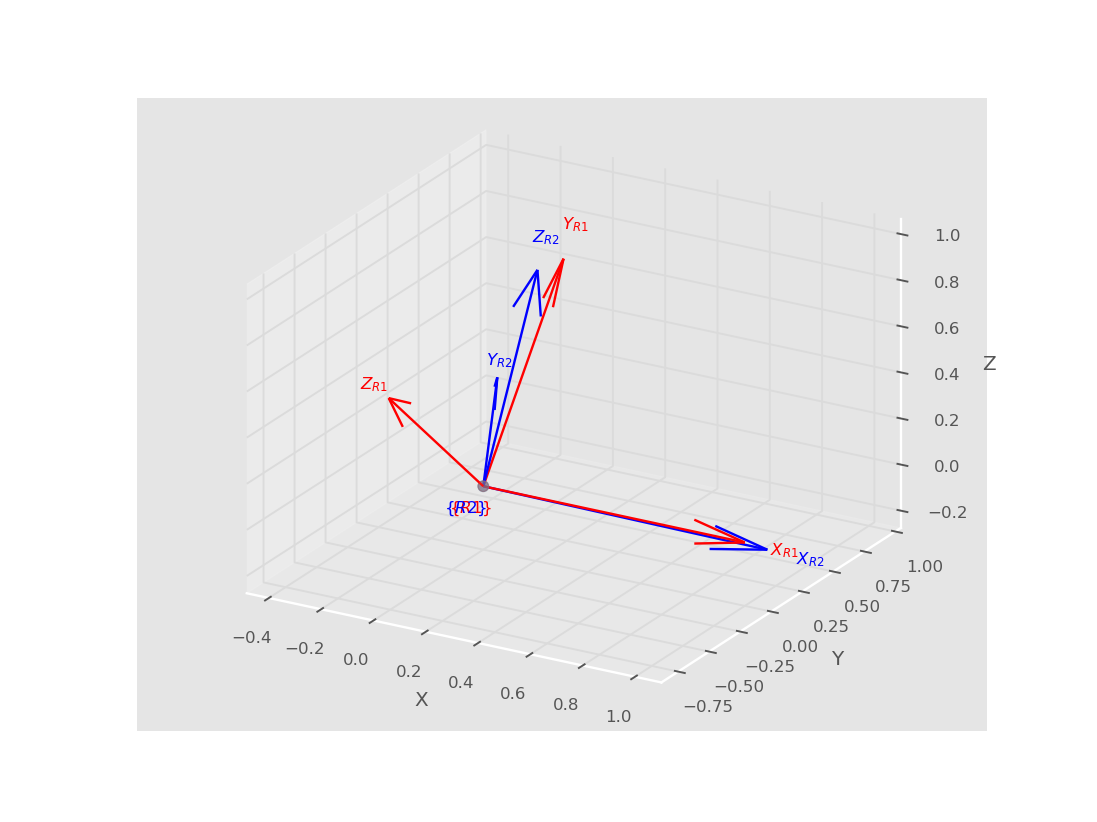

In [5]:
fig=plt.figure()
trplot(R1, frame='R1', color='red');
trplot(R2, frame='R2');

Find the eigenvalues of the rotation matrix using the eig() function:

In [12]:
eVal,eVec = np.linalg.eig(R2)
print('We get 3 eignevalues (3 rows). Which value is composed of only real numbers? That value indicates no rotation along the corresponding eigenvector axis \n', 
     eVal[0], '\n', 
     eVal[1], '\n', 
     eVal[2], '\n', )

We get 3 eignevalues (3 rows). Which value is composed of only real numbers? That value indicates no rotation along the corresponding eigenvector axis 
 (0.9019143341097934+0.4319149614533955j) 
 (0.9019143341097934-0.4319149614533955j) 
 (1+0j) 



The real eigenvalue is the 3rd one.

In [13]:
print(eVal)

[0.90191+0.43191j 0.90191-0.43191j 1.     +0.j     ]


 Use the eignevectors associated with eigevalue [2] (the third col) to extract our axis of rotation.

In [14]:
eVec=np.vstack(eVec[:,2]) # vstack helps us to display vertically. easier to see.
np.set_printoptions(precision=5)
print(eVec)

[[0.04501+0.j]
 [0.44855+0.j]
 [0.89262+0.j]]


We can do the equivalent calculation, by using the toolbox function tr2angvec() which contains the appropriate computation:

In [ ]:
angle,vec=tr2angvec(R)
print('Rotation angle is: ', angle)
print('Rotation axis is:  ', vec)

The angle can be recovered from $\lambda=cos(\theta) \pm i*sin(\theta)$

Simpler visual example:

In [ ]:
T = troty(0.78)
v, theta = tr2angvec(T)
print(v, theta)

---